# Wine Quality Analysis
## Author-Adarsh Tiwari

##### First I will perform some data analysis followed by extracting outliers, feature engineering, data preprocessing, suitable model selection and testing the dataset on that model

## Importing necessary Libraries and loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [2]:
df=pd.read_excel('redwine.xlsx')

# Exploratory Data Analysis

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


### All the features(columns) are of float type 

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


#### We find that one row in each feature 'total sulfur dioxide', ' pH', and 'quality' is missing so next find that position and fill it with median value of each feature

In [7]:
df[df['total sulfur dioxide'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


In [8]:
df.loc[9]['total sulfur dioxide']=38

In [9]:
df[df['pH'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.997,NaN,0.58,9.3,6.0


In [10]:
df.loc[184]['pH']=3.52

In [11]:
df[df['quality'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


In [12]:
df.loc[123]['quality']=6

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [14]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       55
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [15]:
df.quality.unique()

array([5., 6., 7., 4., 8., 3.])

#### Red Wines are rated in the range of 3-8 with respect to its quality

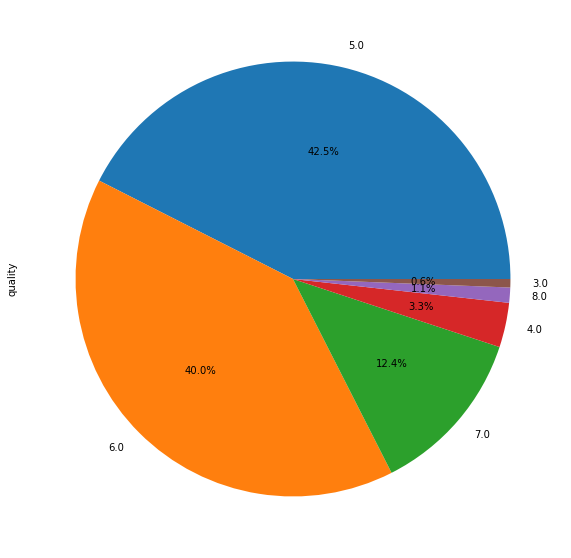

In [16]:
plt.figure(1, figsize=(10,10))
df['quality'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Above Pie plot tells percentage of wines belonging to different quality in our dataset and it is clear that most of the wines belong to quality of 5,6,7 which is the average quality of red wine

In [17]:
df['quality'].value_counts()

5.0    680
6.0    639
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

In [18]:
def diagnostic_plots(df, variable,target):

    plt.figure(figsize=(20, 4))

    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title(f'Histogram of {variable}')

    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title(f'Scatterplot of {target } vs {variable} ')
    plt.xlabel(variable)
    plt.ylabel(target)

    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title(f'Boxplot of {variable}')
    
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title(f'Barplot of {target} vs {variable}') 
    plt.show()
    

### Study of other features vs Quality

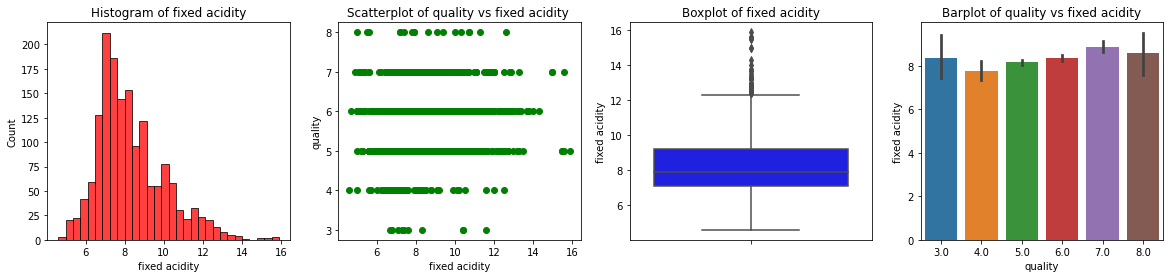

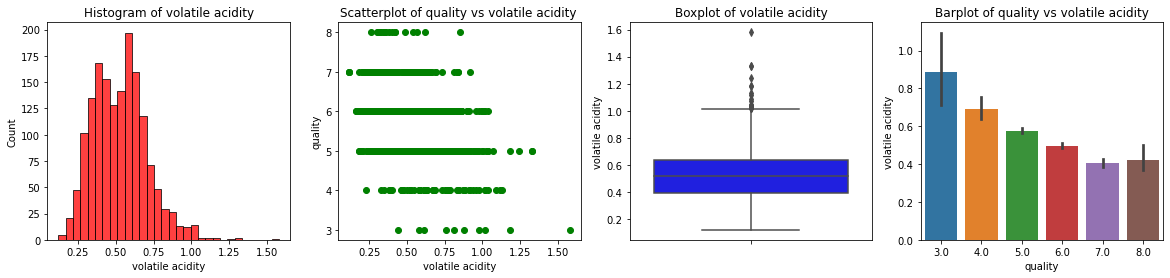

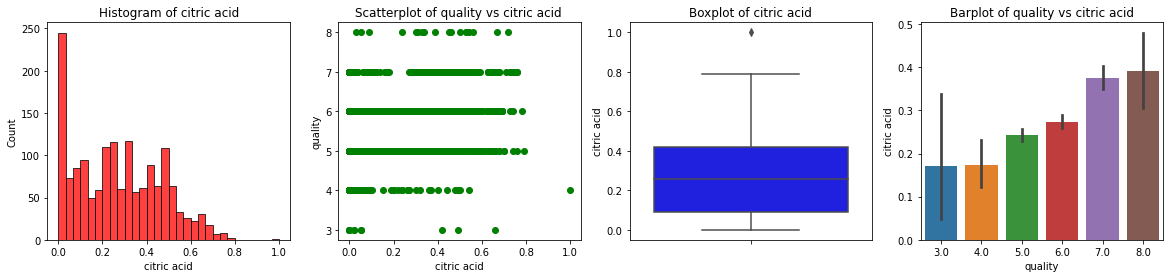

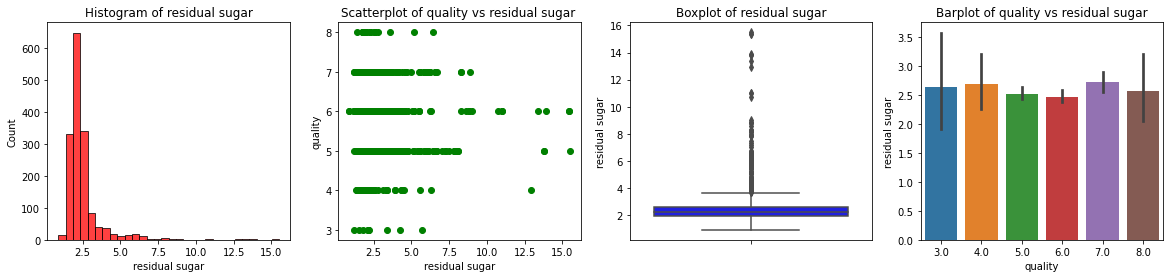

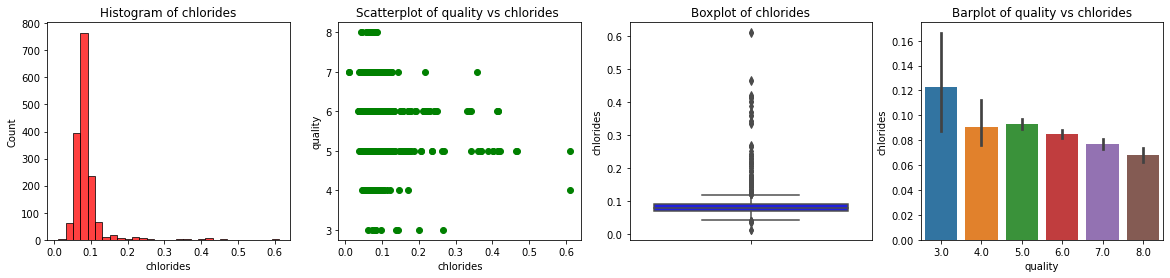

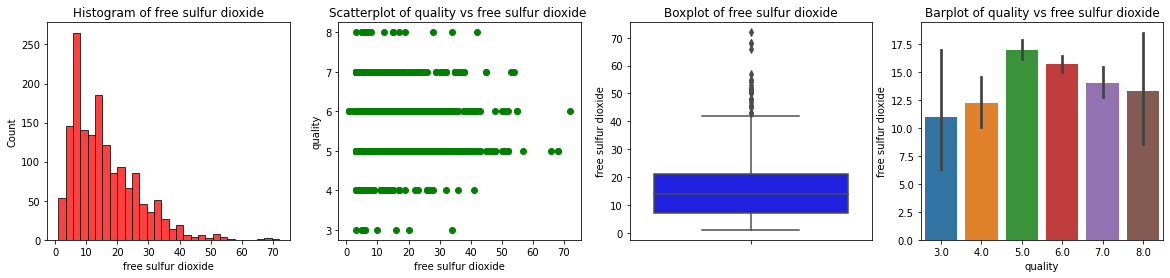

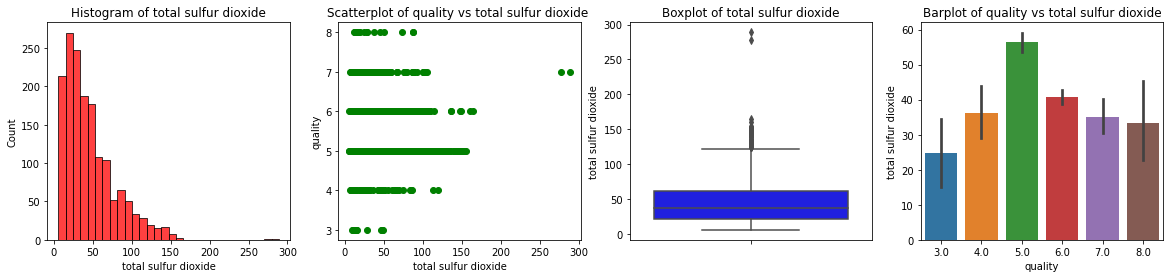

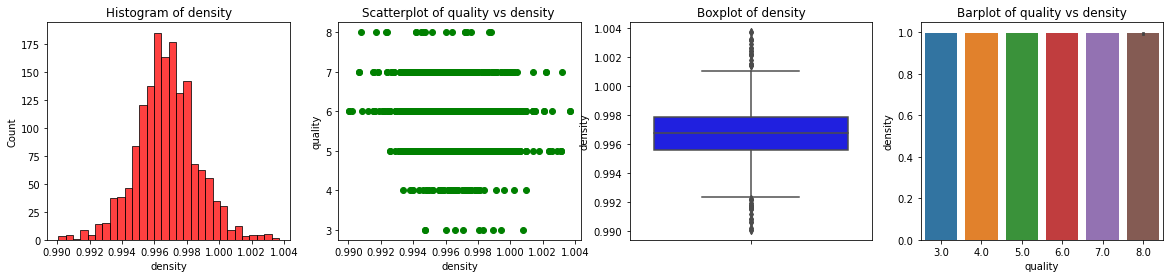

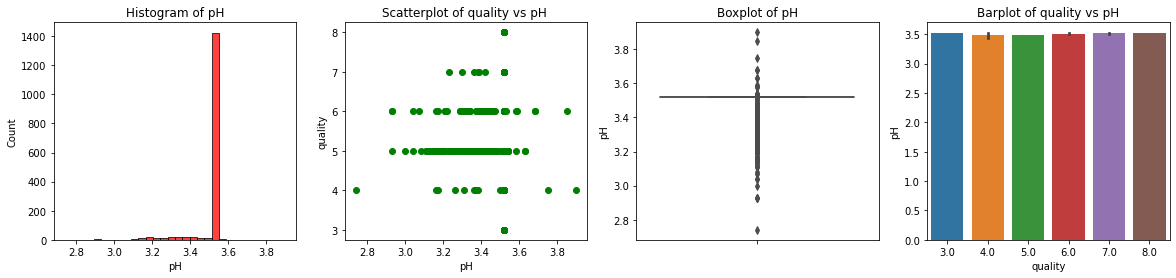

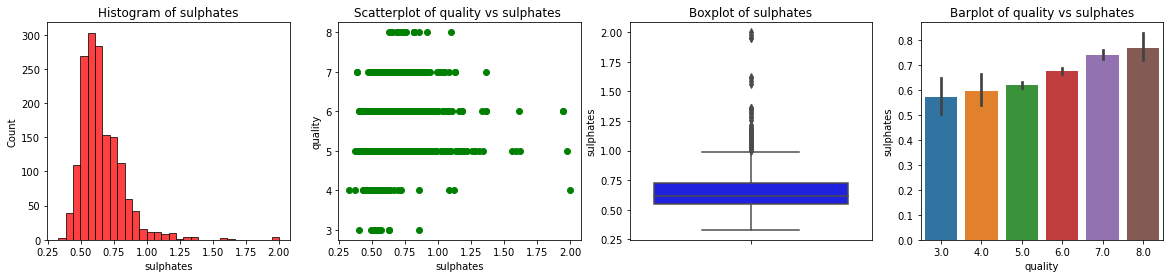

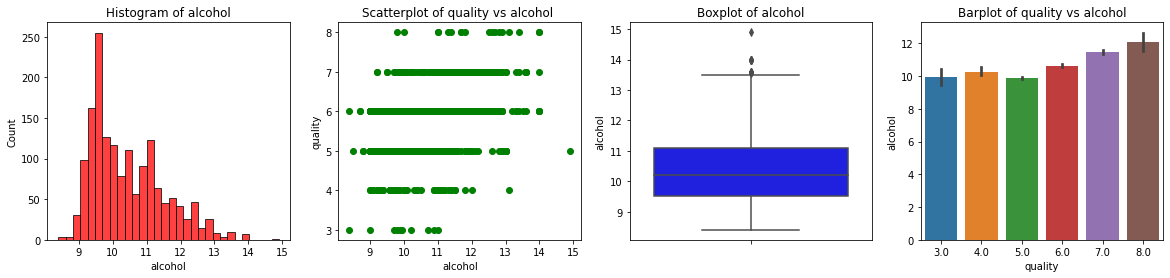

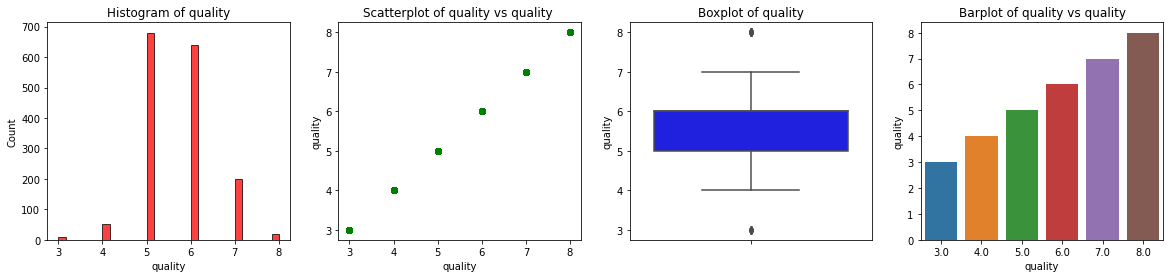

In [19]:
for x in df:
    diagnostic_plots(df,x,'quality')

### Findings-
#### Fixed acidity is somewhat same for all qualities (around 8 units)
#### Quality of red wine increases with decrease in volatile acidity and wine with volatile acidity of around 0.4 units is considered good while above 0.6 is considered bad
#### Quality increases with increase in level of citric acid with level above 0.3 is preferable
#### Residual sugar is almost constant for all the qualities of wine
#### Quality of wine increases with decrease in chloride level with value around 0.6-0.8 being considered favourable
#### Density of wines is constant and around 1 unit
#### pH value of all wines are around 3.5
#### Quality increases with increase in sulphates level 
#### Alcohol content is also directly proportional to the Quality of Red Wine

In [30]:
corri=df.corr()

In [29]:
pd.DataFrame(corri)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.112707,0.668047,0.027389,0.183006,-0.061668,0.123926
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076726,0.022026,-0.046365,-0.260987,-0.202288,-0.389820
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035007,0.364947,0.008362,0.312770,0.109903,0.225324
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.200127,0.355283,0.039934,0.005527,0.042075,0.013767
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047868,0.200632,-0.258666,0.371260,-0.221141,-0.129046
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.668118,-0.021946,-0.025510,0.051658,-0.069408,-0.051024
total sulfur dioxide,-0.112707,0.076726,0.035007,0.200127,0.047868,0.668118,1.000000,0.070652,-0.162208,0.041965,-0.205922,-0.184619
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.070652,1.000000,-0.037922,0.148506,-0.496180,-0.174592
pH,0.027389,-0.046365,0.008362,0.039934,-0.258666,-0.025510,-0.162208,-0.037922,1.000000,-0.260578,0.233217,0.133788
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.041965,0.148506,-0.260578,1.000000,0.093595,0.250844


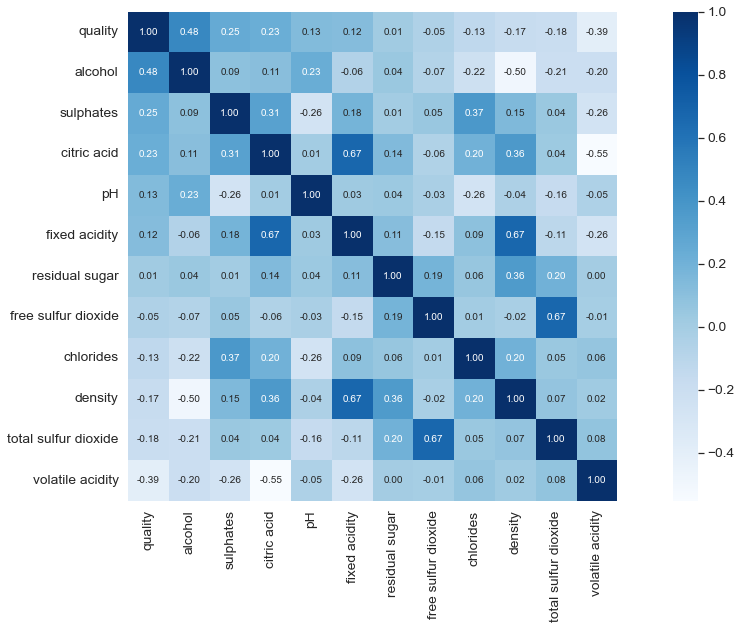

In [34]:
corr = df.corr()
plt.figure(figsize=(20, 9))
k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

#### Dark shades represents positive correlation while lighter shades represents negative correlation.

#### Observations:
     Here we can infer that “density” has strong positive correlation with “fixed acidity” whereas it has strong negative correlation with “alcohol”.

     “free sulphur dioxide” and “pH”, "residual sugar" has almost no correlation with “quality”.

    Since correlation is zero we can infer there is no linear relationship between these two predictors.

     Alcohol has the highest positive correlation with wine quality, followed by the various other variables such as acidity, sulphates, density & chlorides.


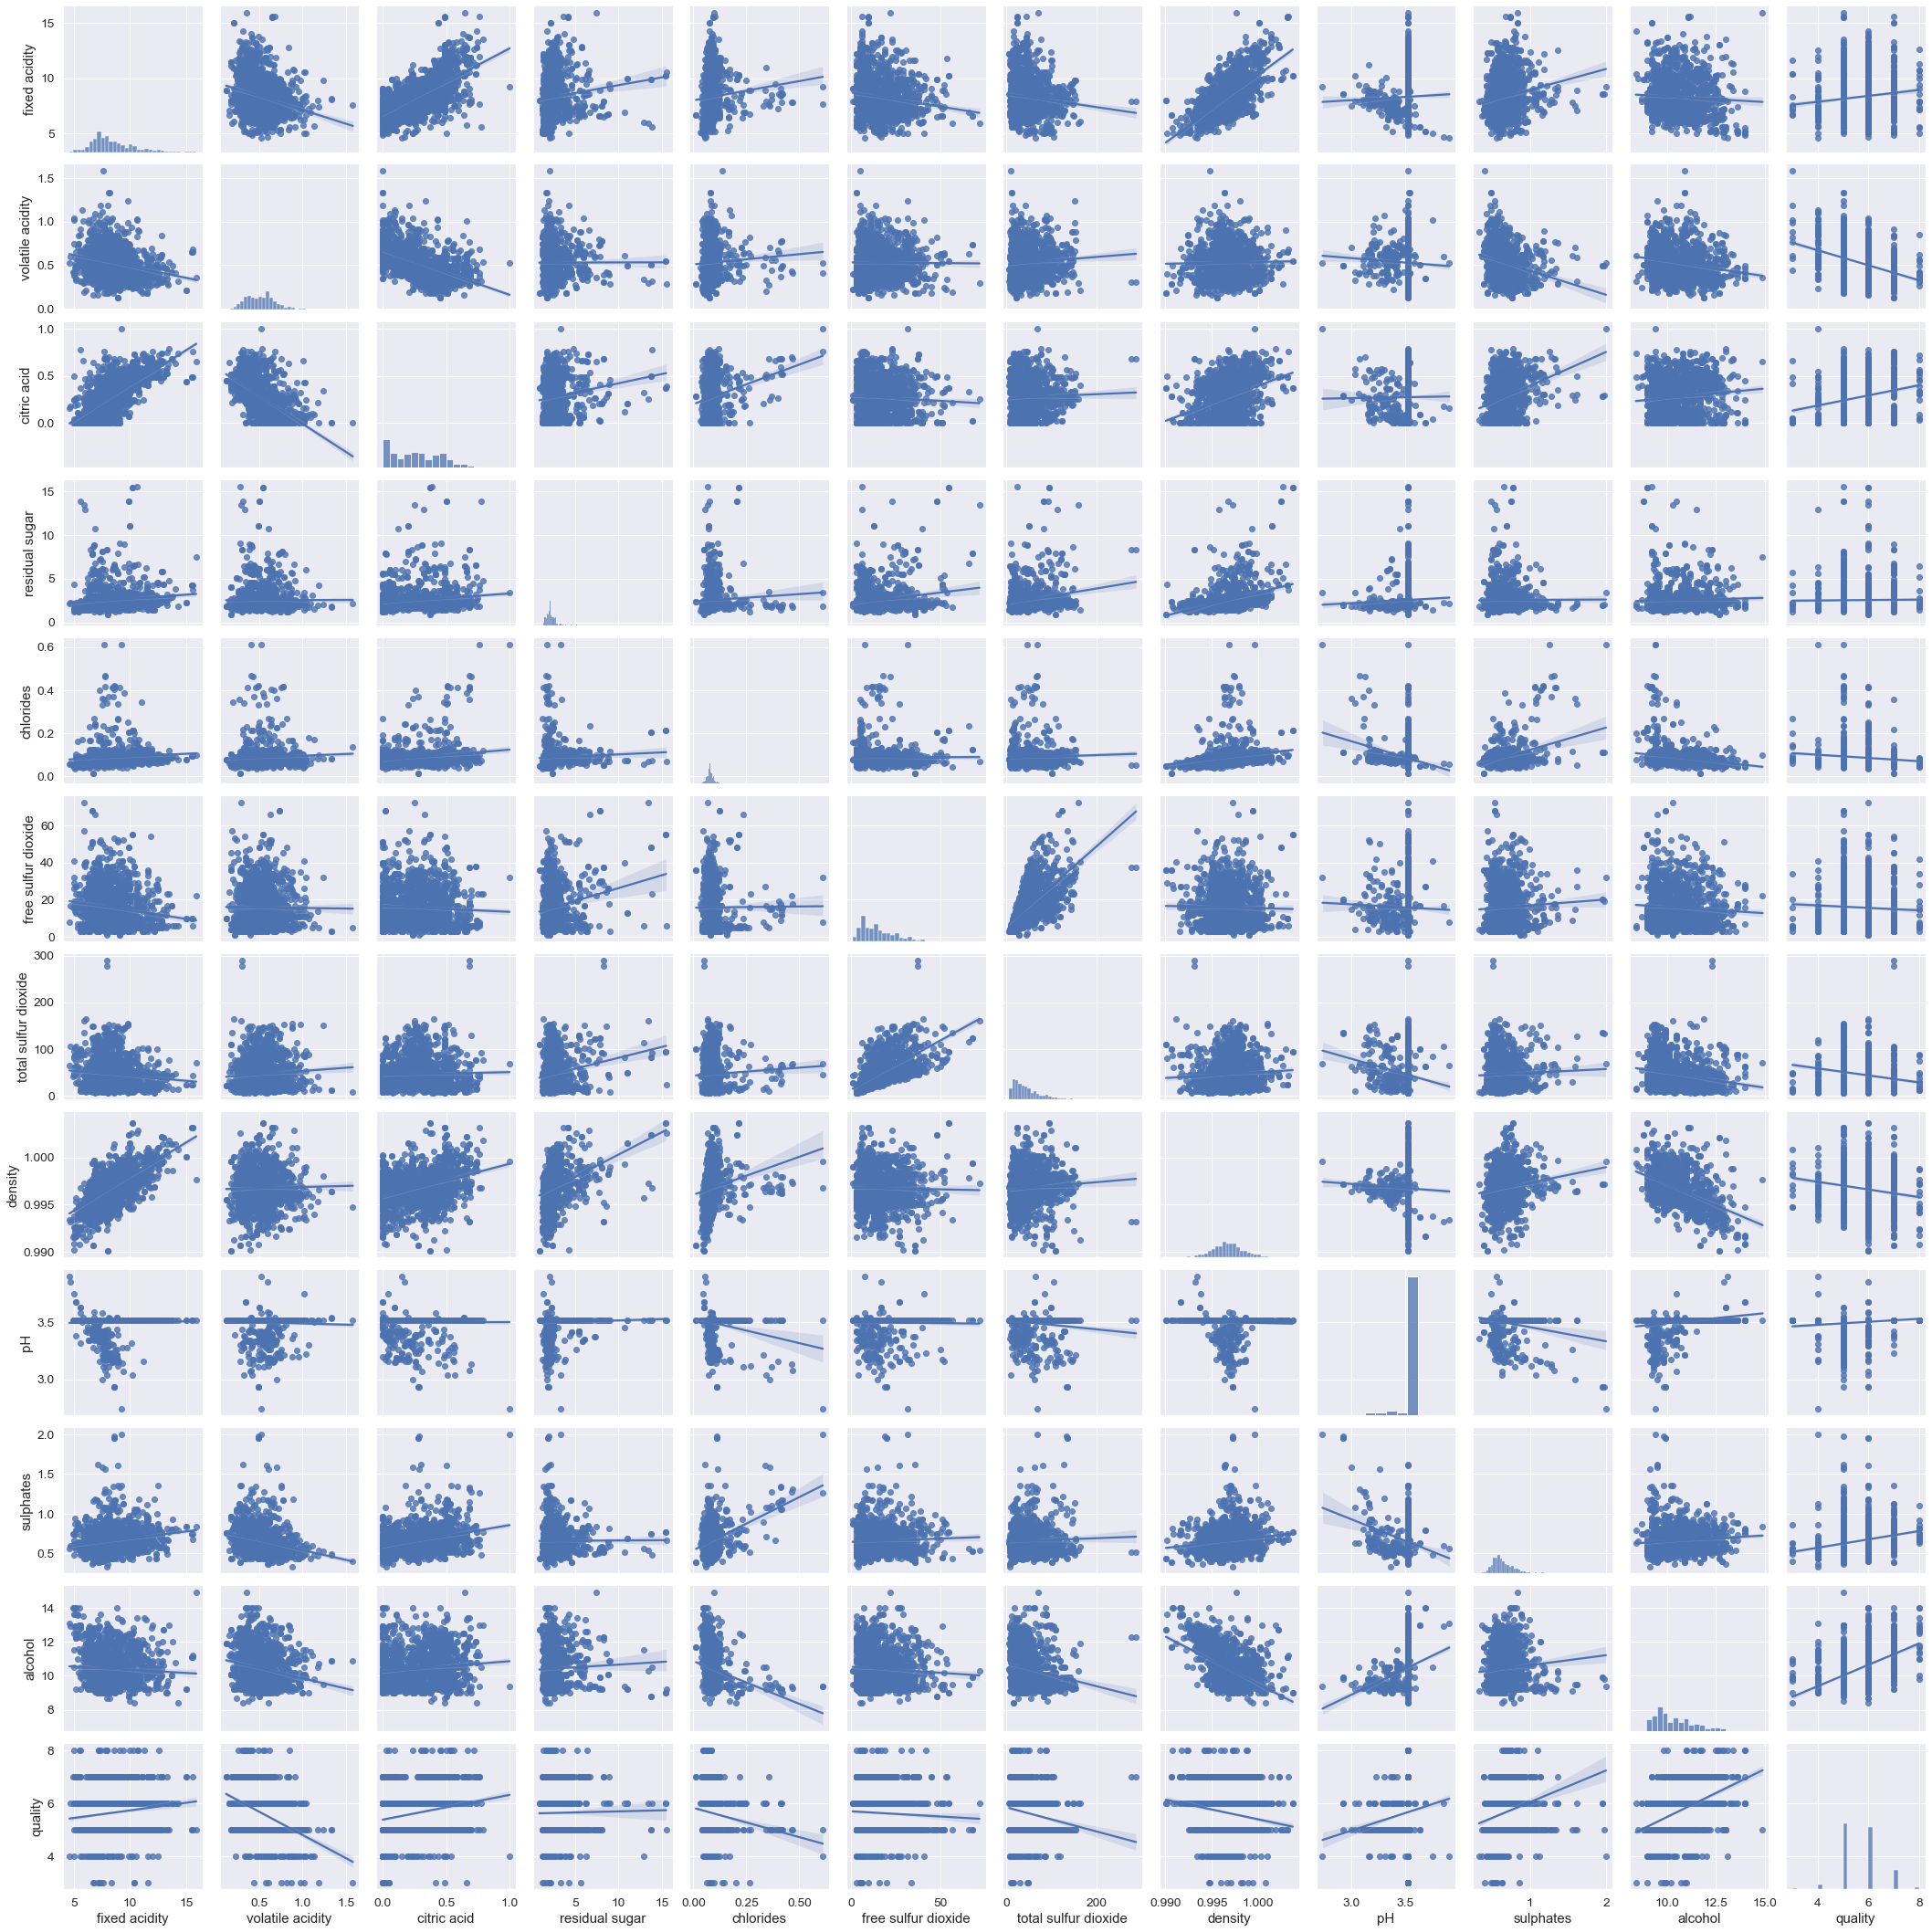

In [35]:
sns.pairplot(df,palette='blues',kind='reg')

#### Most of the features are skewd

# Feature Engineering
 

### OUTLIER detection using numerical outlier technique

##### Numeric Outlier is the simplest, nonparametric outlier detection technique in a one-dimensional feature space. The outliers are calculated by means of the IQR (InterQuartile Range). For example, the first and the third quartile (Q1, Q3) are calculated. An outlier is then a data point xi that lies outside the interquartile range.

##### Using the interquartile multiplier value k=1.5, the range limits are the typical upper and lower whiskers of a box plot.

In [36]:
def detect_outliers(df,features):# this function will detect outliers 
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [42]:
df.iloc[detect_outliers(df,df.columns)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.52,0.77,13.0,5.0
364,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.52,0.73,10.0,7.0
366,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.52,0.73,10.0,7.0
374,14.0,0.410,0.63,3.80,0.089,6.0,47.0,1.00140,3.52,0.81,10.8,6.0
442,15.6,0.685,0.76,3.70,0.100,6.0,43.0,1.00320,3.52,0.68,11.2,7.0
538,12.9,0.350,0.49,5.80,0.066,5.0,35.0,1.00140,3.52,0.66,12.0,7.0
554,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,3.52,0.74,11.1,5.0
555,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,3.52,0.74,11.1,5.0
557,15.6,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,3.52,0.74,11.1,5.0
559,13.0,0.470,0.49,4.30,0.085,6.0,47.0,1.00210,3.52,0.68,12.7,6.0


#### Above 52 outliers contains some of the best and worst Red wines(Quality 8 are best ones and 3 are worst ones) 
#### Those which do not belong to either have some of the other contents out of order

In [43]:
df.iloc[detect_outliers(df,df.columns)].count()

fixed acidity           52
volatile acidity        52
citric acid             52
residual sugar          52
chlorides               52
free sulfur dioxide     52
total sulfur dioxide    52
density                 52
pH                      52
sulphates               52
alcohol                 52
quality                 52
dtype: int64

#### Since there are 52 outliers out of our dataset having 1599 entries , we may as well remove them to make better prediction model.

In [46]:
df=df.drop(df.iloc[detect_outliers(df,df.columns)].index)

In [47]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


### Next we drop duplicate entries in our dataset

In [48]:
df=df.drop_duplicates()

In [49]:
df.shape

(1316, 12)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1316 non-null   float64
 1   volatile acidity      1316 non-null   float64
 2   citric acid           1316 non-null   float64
 3   residual sugar        1316 non-null   float64
 4   chlorides             1316 non-null   float64
 5   free sulfur dioxide   1316 non-null   float64
 6   total sulfur dioxide  1316 non-null   float64
 7   density               1316 non-null   float64
 8   pH                    1316 non-null   float64
 9   sulphates             1316 non-null   float64
 10  alcohol               1316 non-null   float64
 11  quality               1316 non-null   float64
dtypes: float64(12)
memory usage: 133.7 KB


In [51]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.00000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,8.283283,0.528275,0.268511,2.466185,0.085142,15.560030,45.56497,0.996656,3.502561,0.651056,10.438614,5.634498
std,1.676533,0.183276,0.193081,1.199720,0.040753,9.899735,32.28647,0.001795,0.066920,0.152325,1.065206,0.826000
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.00000,0.990070,3.040000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.00000,0.995567,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,37.00000,0.996665,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.089250,21.000000,61.00000,0.997800,3.520000,0.720000,11.100000,6.000000
max,15.000000,1.580000,0.780000,15.500000,0.611000,57.000000,289.00000,1.002890,3.900000,1.620000,14.000000,8.000000


### We saw that a lot of variables show skewness. We will normalize these features using log function.

In [52]:
column = ['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'sulphates', 'alcohol']

import feature_engine.transformation as vt
lt = vt.LogTransformer(variables = column)

lt.fit(df)

LogTransformer(variables=['fixed acidity', 'volatile acidity', 'residual sugar',
                          'chlorides', 'free sulfur dioxide',
                          'total sulfur dioxide', 'sulphates', 'alcohol'])

In [53]:
df = lt.transform(df)

### Next we perform encoding of quality of wine as good when value above 6

In [54]:
good=[]
for x in df.quality:
    if x>6:
        good.append(1)
    else:
        good.append(0)

In [55]:
df['quality']=good

In [57]:
df['quality'].value_counts()

0    1135
1     181
Name: quality, dtype: int64

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from collections import Counter

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


## Data Preprocessing

### Training dataset

In [60]:

X_train, X_test, y_train, y_test = train_test_split(df.drop(['quality'], axis=1),
                                                    df['quality'],
                                                    test_size=0.25,
                                                    random_state=0)

X_train.shape, X_test.shape

((987, 11), (329, 11))

### Feature Scaling

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. The method we use to do feature scaling is MIn - max scaler

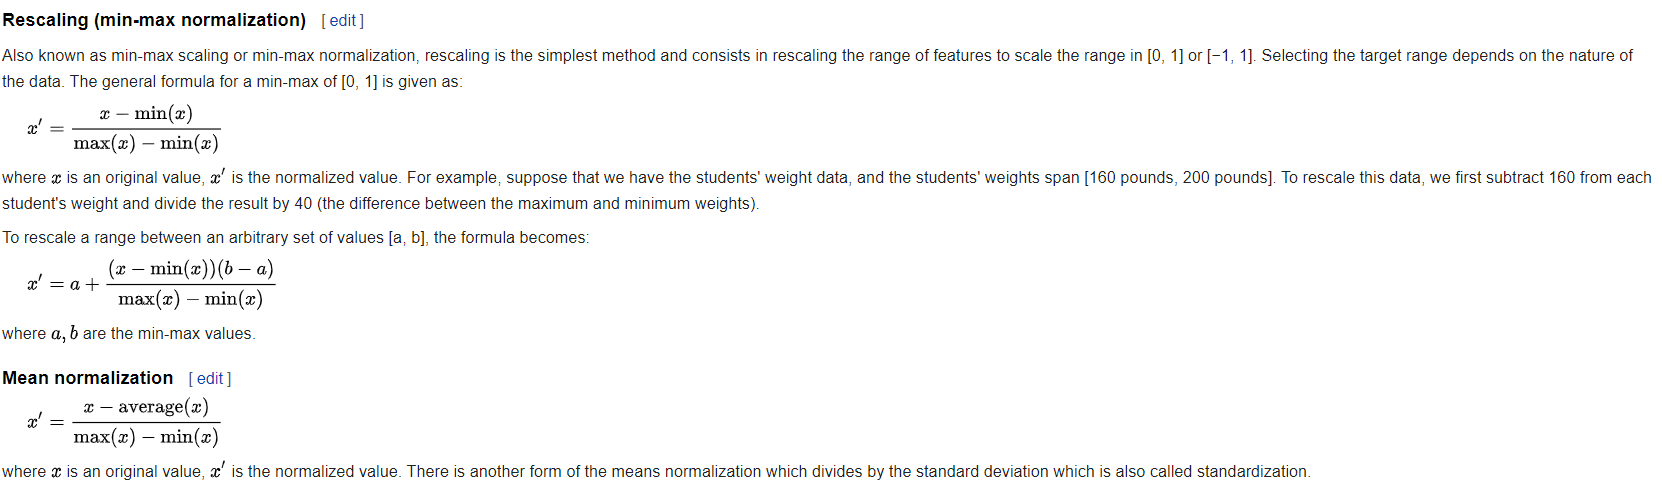

In [63]:
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Following are the models on which we will be training and testing our dataset and choose the best among them. The methods are Decision Tree classifier, Support Vector Classifer, Random forest Classifier, K- Neighbors Classifier, Stocastic Gradient Descent Classifier

In [64]:
dct = DecisionTreeClassifier(random_state = 42)
svc = SVC(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
logreg = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier()
sgd = SGDClassifier()

In [65]:
classifiers = [
    ("knn" , knn),
    ("rf" , rf),
    ("logreg" , logreg),
    ("svc", svc),
    ("sgd",sgd),
    ("dct",dct)
]

In [68]:
for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Evaluate clf's accuracy on the test set
    print('{:s} score : {:.3f}'.format(clf_name, acc))

knn score : 0.881
rf score : 0.900
logreg score : 0.881
svc score : 0.897
sgd score : 0.888
dct score : 0.836


### Random Forest classifier gives 90% accuracy so we use it as our train-test model to fit our dataset and predict

A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

#### Next we perform cross-validation using 'GridSearchCV'
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.
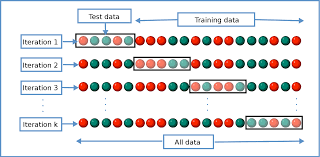
Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

The three steps involved in cross-validation are as follows :

1.Reserve some portion of sample data-set.

2.Using the rest data-set train the model.

3.Test the model using the reserve portion of the data-set.

In [69]:
param_grid ={
    'n_estimators' : [10,50,100,150],
    'max_depth': (1,5,10,15),
    'min_samples_leaf': (1,5,10,15,)
    }

### GridSearchCV
GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.The performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.
We are going to briefly describe a few of these parameters and the rest you can see on the original documentation:

1.estimator: Pass the model instance for which you want to check the hyperparameters.

2.params_grid: the dictionary object that holds the hyperparameters you want to try

3.scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric

4.cv: number of cross-validation you have to try for each selected set of hyperparameters

5.verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV

6.n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors. 

In [70]:
gridsearch = GridSearchCV(rf, param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=10)

In [71]:

gridsearch.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=10,
             param_grid={'max_depth': (1, 5, 10, 15),
                         'min_samples_leaf': (1, 5, 10, 15),
                         'n_estimators': [10, 50, 100, 150]},
             scoring='accuracy')

In [72]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

Getting scores for different paramenter and using the best amongst them

In [73]:
display(gridsearch)

Best parameters are: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 150}


0.856 + or -0.002 for the {'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 10}
0.856 + or -0.002 for the {'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 50}
0.856 + or -0.002 for the {'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 100}
0.856 + or -0.002 for the {'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 150}
0.856 + or -0.002 for the {'max_depth': 1, 'min_samples_leaf': 5, 'n_estimators': 10}
0.856 + or -0.002 for the {'max_depth': 1, 'min_samples_leaf': 5, 'n_estimators': 50}
0.856 + or -0.002 for the {'max_depth': 1, 'min_samples_leaf': 5, 'n_estimators': 100}
0.856 + or -0.002 for the {'max_depth': 1, 'min_samples_leaf': 5, 'n_estimators': 150}
0.856 + or -0.002 for the {'max_depth': 1, 'min_samples_leaf': 10, 'n_estimators': 10}
0.856 + or -0.002 for the {'max_depth': 1, 'min_samples_leaf': 10, 'n_estimators': 50}
0.856 + or -0.002 for the {'max_depth': 1, 'min_s

In [74]:
gridsearch.best_params_

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 150}

In [75]:
rf = RandomForestClassifier(max_depth=15, min_samples_leaf = 1, n_estimators = 150)

In [76]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=150)

In [77]:
pred = rf.predict(X_test)

In [78]:
print("Accuracy Score:",accuracy_score(pred,y_test))
print("classification Report:\n",classification_report(pred,y_test))

Accuracy Score: 0.8996960486322189
classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       301
           1       0.44      0.61      0.51        28

    accuracy                           0.90       329
   macro avg       0.70      0.77      0.73       329
weighted avg       0.92      0.90      0.91       329



### The accuracy of our model is 89.96%

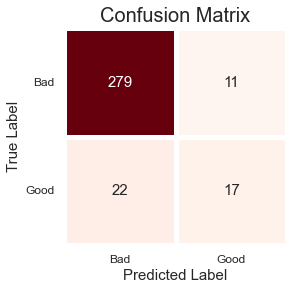

In [79]:
cm = confusion_matrix(y_test, pred)

df1 = pd.DataFrame(columns=["Bad","Good"], index= ["Bad","Good"], data= cm )

f,ax = plt.subplots(figsize=(4,4))

sns.heatmap(df1, annot=True,cmap="Reds", fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 20)
plt.show()

A confusion matrix, also known as an error matrix is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).
IT is a table with two rows and two columns that reports the number of true positives, false negatives, false positives, and true negatives. This allows more detailed analysis than simply observing the proportion of correct classifications (accuracy). Accuracy will yield misleading results if the data set is unbalanced; that is, when the numbers of observations in different classes vary greatly.

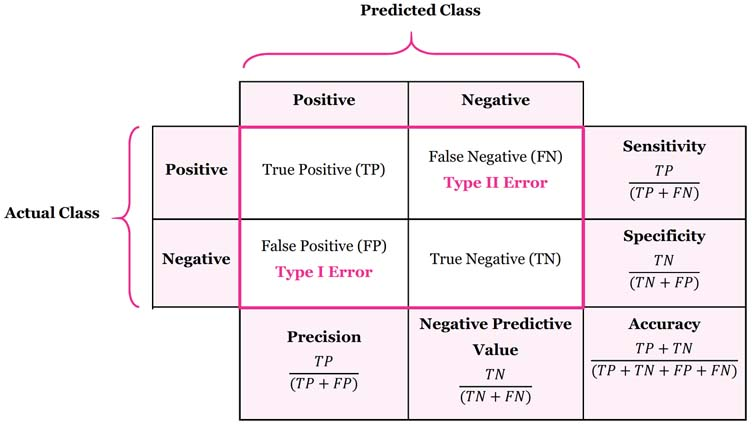

# THANK YOU